In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [86]:
two_to_one_df = pd.read_csv("results/results_2_to_1_new_emip.csv")
one_to_one_df = pd.read_csv("results/results_1_to_1_new_emip.csv")
two_to_one_df.columns

Index(['Unnamed: 0', 'rmse', 'oos_rmse', 'FGI', 'in_study_prediction',
       'in_study_labels', 'oos_prediction', 'oos_labels',
       'dimensionality_reduction', 'out_of_study', 'in_study',
       'feature_combinations'],
      dtype='object')

In [87]:
feature_group_regexes = {
    "eye_tracking": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
    ],
    "heatmaps": [
        "heatmaps_*",
    ],
    "fft": [
        "pupil_diameter_rolling__fft_aggregated_*",
        "^duration_rolling__fft_aggregated__*",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_duration_rolling__fft_aggregated__*",
    ],
    "lhipa": [
        "pupil_diameter_rolling__lhipa",
        "saccade_length_rolling__lhipa",
        "saccade_duration_rolling__lhipa",
        "^duration_rolling__lhipa",
    ],
    "markov": [
        "^duration_rolling__markov",
        "pupil_diameter_rolling__markov",
        "saccade_duration_rolling__markov",
        "saccade_length_rolling__markov",
    ],
    "Arma": [
        "pupil_diameter_rolling__arma__*",
        "^duration_rolling__arma__*",
        "saccade_length_rolling__arma__*",
        "saccade_duration_rolling__arma__*",
    ],
    "garch": [
        "saccade_duration_rolling__garch",
        "^duration_rolling__garch",
        "pupil_diameter_rolling__garch",
        "saccade_length_rolling__garch",
    ],
    "pupil_diameter": [
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
    ],
    "fixation_duration": [
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
    ],
    "saccade_length": [
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
    ],
    "saccade_duration": [
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
    "all": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
        "heatmaps_*",
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
}

baselines = {
    "cscw": 0.2054194369131811,
    "emip": 0.31011607853729956,
    "fractions": 0.22897823445668405,
    "emip_fractions": 0.2943192380673428,
    "fractions_cscw": 0.23408157826890597,
    "emip_cscw": 0.28871689591649174,
}

random_baselines = {
    "cscw": 0.35408194888273653,
    "emip": 0.4241358322246148,
    "fractions": 0.39295164906188074,
    "emip_fractions": 0.4170846635199361,
    "fractions_cscw": 0.37619048780763514,
    "emip_cscw": 0.40841293420269603,
}

oos_baselines = {
    "cscw": 0.32471610114605565,
    "emip": 0.432999224871373,
    "fractions": 0.3569925826393109,
    "emip_fractions": 0.4171820619321137,
    "fractions_cscw": 0.3537846986139497,
    "emip_cscw": 0.4084394493388968,
}


name_mapping = {
    "['cscw']": "cscw",
    "['emip']": "emip",
    "['fractions']": "fractions",
    "['emip', 'fractions']": "emip_fractions",
    "['fractions', 'cscw']": "fractions_cscw",
    "['emip', 'cscw']": "emip_cscw",
    "['fractions', 'emip']": "emip_fractions",
    "['cscw', 'fractions']": "fractions_cscw",
    "['cscw', 'emip']": "emip_cscw",
}

inv_map = {str(v): k for k, v in feature_group_regexes.items()}
map_names = lambda x: name_mapping.get(str(x), x)
two_to_one_df["feature_combinations"] = two_to_one_df["feature_combinations"].map(
    inv_map
)
two_to_one_df["in_study"] = two_to_one_df["in_study"].map(map_names)
two_to_one_df["baseline"] = two_to_one_df.loc[:, "in_study"].map(baselines)
two_to_one_df["oos_baseline"] = two_to_one_df.loc[:, "out_of_study"].map(oos_baselines)
two_to_one_df["random_baseline"] = two_to_one_df.loc[:, "in_study"].map(
    random_baselines
)
two_to_one_df["oos_random_baseline"] = df.loc[:, "out_of_study"].map(random_baselines)


one_to_one_df["feature_combinations"] = one_to_one_df["feature_combinations"].map(
    inv_map
)
one_to_one_df["in_study"] = one_to_one_df["in_study"].map(map_names)
one_to_one_df["baseline"] = one_to_one_df.loc[:, "in_study"].map(baselines)
one_to_one_df["oos_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(oos_baselines)
one_to_one_df["random_baseline"] = one_to_one_df.loc[:, "in_study"].map(
    random_baselines
)
one_to_one_df["oos_random_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(
    random_baselines
)


In [103]:
def filter_on_baselines(df):
    return df[(df["rmse"] < df["baseline"]) & (df["oos_rmse"] < df["oos_baseline"])]

print(filter_on_baselines(one_to_one_df).loc[:,"FGI"].min(), "smallest FGI 1to1")
print(filter_on_baselines(two_to_one_df).loc[:,"FGI"].min(), "smallest FGI 1to1")

0.0076703767 smallest FGI 1to1
0.0070310018000000005 smallest FGI 1to1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Arma'),
  Text(1, 0, 'all'),
  Text(2, 0, 'eye_tracking'),
  Text(3, 0, 'fft'),
  Text(4, 0, 'fixation_duration'),
  Text(5, 0, 'garch'),
  Text(6, 0, 'heatmaps'),
  Text(7, 0, 'lhipa'),
  Text(8, 0, 'markov'),
  Text(9, 0, 'pupil_diameter'),
  Text(10, 0, 'saccade_duration'),
  Text(11, 0, 'saccade_length')])

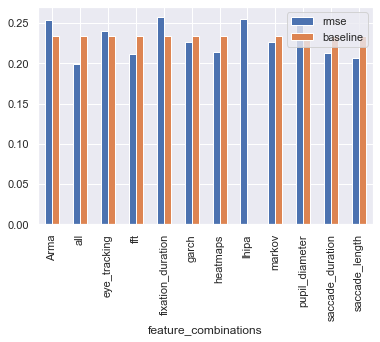

In [15]:
#MINIMUM RMSE PER FEATURE
minimum_rmse = two_to_one_df.loc[df.groupby('feature_combinations')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="feature_combinations", y=["rmse", "baseline"])
plt.xticks(rotation=90)

,Unnamed: 0,rmse,oos_rmse,FGI,in_study_prediction,in_study_labels,oos_prediction,oos_labels,dimensionality_reduction,out_of_study,in_study,feature_combinations,baseline,oos_baseline,random_baseline,oos_random_baseline
34,34,0.329550,0.280099,0.009870,"[0.5548399841, 0.39658715720000004, 0.36426570...","{'202': 0.5, '17': 0.5, '64': 0.5, '51': 0.75,...","[0.3683145082, 0.3790391595, 0.3595289399, 0.3...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,NaN,Arma,NaN,0.205419,NaN,0.281477
46,46,0.322560,0.250675,0.009962,"[0.2466693369, 0.4936064236, 0.4226399905, 0.2...","{'6': 0.5, '96': 0.5, '4': 0.125, '5': 0.125, ...","[0.4275577471, 0.3899466149, 0.450143820100000...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,NaN,all,NaN,0.205419,NaN,0.281477
24,24,0.316091,0.256028,0.009449,"[0.2574709441, 0.6035866128, 0.354661332400000...","{'15': 0.5, '44': 0.0, '181': 0.0, '104': 0.5,...","[0.4088299124, 0.4116696439, 0.3819886054, 0.2...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,NaN,eye_tracking,NaN,0.205419,NaN,0.281477
29,29,0.306359,0.230231,0.010264,"[0.3920970593, 0.5797933148000001, 0.416459698...","{'36': 0.125, '203': 0.0, '48': 0.5, '14': 0.5...","[0.5760565461, 0.49385568560000004, 0.41645973...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,NaN,fft,NaN,0.205419,NaN,0.281477
41,41,0.297726,0.249264,0.009628,"[0.322264162, 0.5956689886000001, 0.3304537892...","{'51': 0.0, '79': 1.0, '18': 0.5, '120': 0.0, ...","[0.5104450239, 0.2585569063, 0.2107998338, 0.5...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,NaN,fixation_duration,NaN,0.205419,NaN,0.281477
36,36,0.303358,0.284780,0.009297,"[0.3988688032, 0.33371494220000003, 0.48201968...","{'143': 0.5, '205': 0.0, '213': 0.0, '177': 0....","[0.4163943787, 0.41453202780000004, 0.29276243...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,NaN,garch,NaN,0.205419,NaN,0.281477
27,27,0.324929,0.248233,0.010003,"[0.298006056, 0.46327102080000004, 0.408640646...","{'83': 0.75, '153': 0.0, '145': 0.5, '176': 0....","[0.4185070822, 0.32387190650000003, 0.30755163...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,NaN,heatmaps,NaN,0.205419,NaN,0.281477
30,30,0.293264,0.266906,0.009093,"[0.4486575533, 0.5862307562, 0.4486575533, 0.1...","{'192': 0.0, '181': 0.0, '154': 0.5, '52': 0.5...","[0.39202116060000003, 0.4486575533, 0.58331573...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,NaN,lhipa,NaN,0.205419,NaN,0.281477
32,32,0.304271,0.257417,0.009765,"[0.43367271020000003, 0.3513668176, 0.53849616...","{'52': 1.0, '90': 0.0, '3': 0.5, '33': 0.5, '8...","[0.3916716531, 0.3208098276, 0.4450370584, 0.3...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",lasso,cscw,NaN,markov,NaN,0.205419,NaN,0.281477
39,39,0.295463,0.250076,0.009693,"[0.4996327405, 0.5130655372, 0.3282550356, 0.3...","{'161': 0.5, '60': 0.5, '71': 0.0, '52': 0.5, ...","[0.25829997450000003, 0.3936922496, 0.51241669...","{'Clynelish_1_1_CMapFixations': 1.0, 'Fetterca...",PCA,cscw,NaN,pupil_diameter,NaN,0.205419,NaN,0.281477


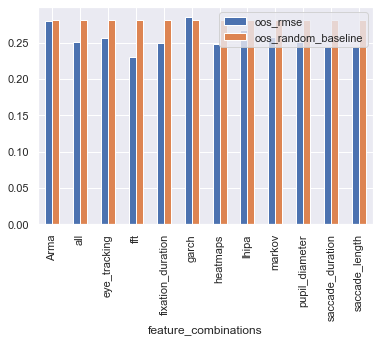

In [16]:
#MINIMUM OOS_RMSE PER FEATURE
minimum_rmse = two_to_one_df.loc[df.groupby('feature_combinations')["oos_rmse"].idxmin()]
minimum_rmse.plot.bar(x="feature_combinations", y=["oos_rmse", "oos_random_baseline"])
plt.xticks(rotation=90)
minimum_rmse

<AxesSubplot:xlabel='in_study'>

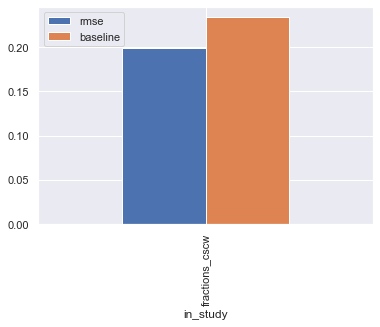

In [17]:
#MINIMUM RMSE PER DATASET
minimum_rmse = two_to_one_df.loc[df.groupby('in_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="in_study", y=["rmse", "baseline"])

<AxesSubplot:xlabel='out_of_study'>

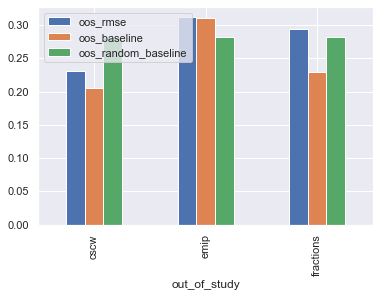

In [18]:
# OOS best pipeline vs baseline
minimum_rmse = df.loc[df.groupby('out_of_study')["oos_rmse"].idxmin()]
minimum_rmse.plot.bar(x="out_of_study", y=["oos_rmse", "oos_baseline", "oos_random_baseline"])

<AxesSubplot:xlabel='in_study'>

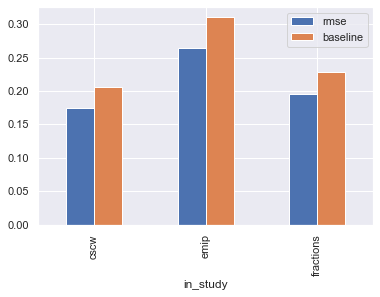

In [19]:
#MINIMUM RMSE PER oos DATASET
minimum_rmse = one_to_one_df.loc[one_to_one_df.groupby('in_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="in_study", y=["rmse", "baseline"])

<AxesSubplot:xlabel='out_of_study'>

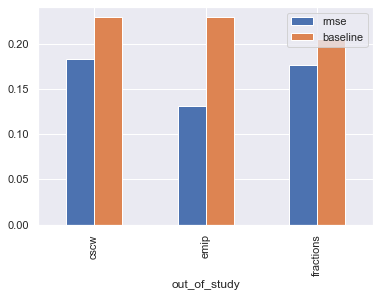

In [325]:
minimum_rmse = one_to_one_df.loc[one_to_one_df.groupby('out_of_study')["rmse"].idxmin()]
minimum_rmse.plot.bar(x="out_of_study", y=["rmse", "baseline"])

/Users/august/Library/Caches/pypoetry/virtualenvs/ideal-pancake-DNon77ew-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


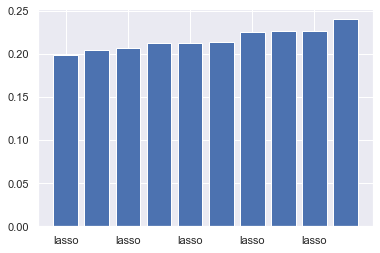

In [22]:
# MEAN RMSE PER oos DATASET
smallest = two_to_one_df.nsmallest(10, "rmse")
fig, ax = plt.subplots()
ax.bar(range(len(smallest.index)), smallest.loc[:, "rmse"])
ax.set_xticklabels(smallest.loc[:, "dimensionality_reduction"])
plt.show()

[Text(0, 0, 'PCA'),
 Text(1, 0, 'lasso'),
 Text(2, 0, 'lasso'),
 Text(3, 0, 'lasso'),
 Text(4, 0, 'lasso'),
 Text(5, 0, 'lasso'),
 Text(6, 0, 'PCA'),
 Text(7, 0, 'lasso'),
 Text(8, 0, 'lasso'),
 Text(9, 0, 'lasso'),
 Text(10, 0, 'PCA'),
 Text(11, 0, 'PCA'),
 Text(12, 0, 'PCA'),
 Text(13, 0, 'lasso'),
 Text(14, 0, 'PCA'),
 Text(15, 0, 'PCA'),
 Text(16, 0, 'lasso'),
 Text(17, 0, 'lasso'),
 Text(18, 0, 'PCA'),
 Text(19, 0, 'PCA')]

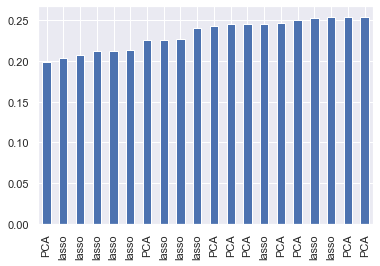

In [24]:
# TOP 13 RMSE with dimensionality reduction
smallest = two_to_one_df.nsmallest(20, "rmse")
ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)

SyntaxError: invalid syntax (<ipython-input-25-7d6bf358f67c>, line 3)

[Text(0, 0, 'garch'),
 Text(1, 0, 'pupil_diameter'),
 Text(2, 0, 'saccade_length'),
 Text(3, 0, 'saccade_duration'),
 Text(4, 0, 'Arma'),
 Text(5, 0, 'pupil_diameter'),
 Text(6, 0, 'markov'),
 Text(7, 0, 'saccade_duration'),
 Text(8, 0, 'fft'),
 Text(9, 0, 'Arma'),
 Text(10, 0, 'all'),
 Text(11, 0, 'fixation_duration'),
 Text(12, 0, 'lhipa')]

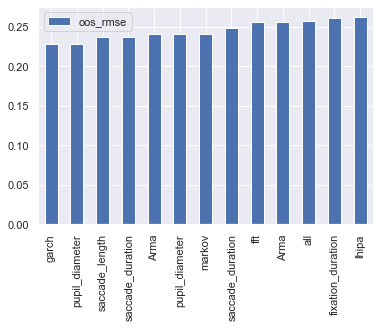

In [329]:
# TOP 13 OOS_RMSE with features
smallest = two_to_one_df.nsmallest(13, "oos_rmse")
ax = smallest.plot(kind="bar", y="oos_rmse", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

In [330]:
# TOP 13 RMSE with dimensionality reduction
smallest = df.nsmallest(13, "rmse")
smallest_with_other_dim = df[df.loc[:, ["feature_combinations", "in_study"]] == smallest.loc[:, ["feature_combinations", "in_study"] ] ]
ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)

ValueError: Can only compare identically-labeled DataFrame objects

[Text(0, 0, 'eye_tracking'),
 Text(1, 0, 'all'),
 Text(2, 0, 'fixation_duration'),
 Text(3, 0, 'all'),
 Text(4, 0, 'pupil_diameter'),
 Text(5, 0, 'saccade_length'),
 Text(6, 0, 'saccade_duration'),
 Text(7, 0, 'fft'),
 Text(8, 0, 'eye_tracking'),
 Text(9, 0, 'saccade_duration'),
 Text(10, 0, 'Arma'),
 Text(11, 0, 'heatmaps'),
 Text(12, 0, 'saccade_duration'),
 Text(13, 0, 'heatmaps'),
 Text(14, 0, 'heatmaps'),
 Text(15, 0, 'markov'),
 Text(16, 0, 'fft'),
 Text(17, 0, 'garch'),
 Text(18, 0, 'saccade_duration'),
 Text(19, 0, 'eye_tracking'),
 Text(20, 0, 'saccade_duration'),
 Text(21, 0, 'saccade_length'),
 Text(22, 0, 'heatmaps'),
 Text(23, 0, 'markov'),
 Text(24, 0, 'heatmaps'),
 Text(25, 0, 'saccade_duration')]

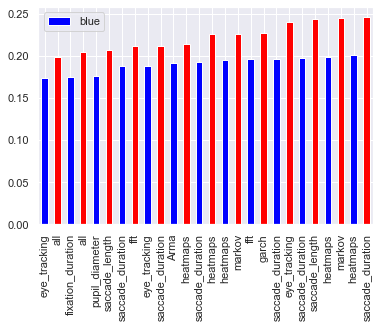

In [26]:
# TOP 13 RMSE with for one to one and 
smallest = two_to_one_df.nsmallest(13, "rmse")
smallest = smallest.reset_index()
smallest.index = 2*smallest.index +1
smallest_oto = one_to_one_df.nsmallest(13, "rmse")
smallest_oto = smallest_oto.reset_index()
smallest_oto.index = 2*smallest_oto.index
smallest = pd.concat([smallest, smallest_oto]).sort_index()


ax = smallest.loc[:,"rmse"].plot(kind="bar", color=['blue','red'], use_index=True)
ax.legend({"blue": "1t1", "red": "2to1"})
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)

In [27]:
two_to_one_df.loc[:, "in_study"].unique()

array(['fractions_cscw', nan], dtype=object)

## DIMENSIONALITY REDUCTION

### BEST DIMENSIONALITY REDUCTION CONTEXT SENSITIVE 

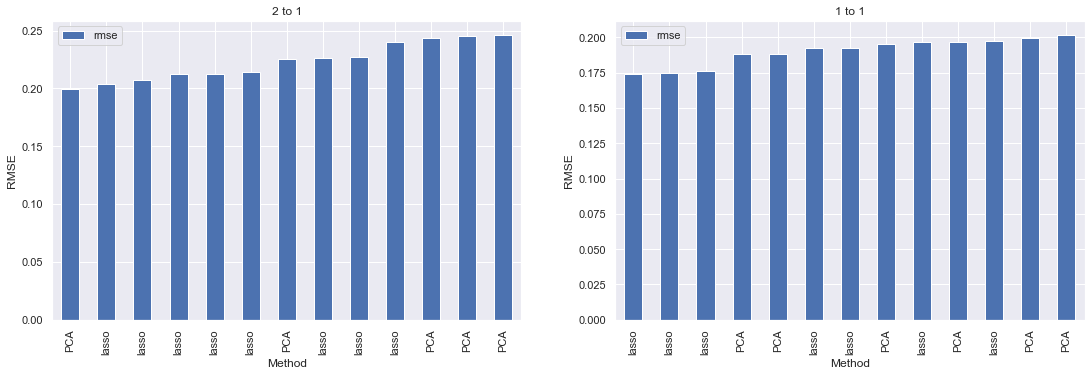

In [106]:

smallest_rmse_two_to_one = two_to_one_df.nsmallest(13, "rmse")
smallest_rmse_one_to_one = one_to_one_df.nsmallest(13, "rmse")


fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18.5, 5.5, forward=True)
dfs = [smallest_rmse_two_to_one, smallest_rmse_one_to_one]
titles = ["2 to 1", "1 to 1"]

def plot_scores_with_dimensionality_reduction(df, ax, title):
    ax = df.plot(kind="bar", y="rmse", use_index=False, ax=ax)
    ax.set_xticks(range(len(smallest)))
    ax.set_xticklabels(df["dimensionality_reduction"], rotation=90)
    ax.set_xlabel("Method")
    ax.set_ylabel("RMSE")
    ax.set_title(title)

for df, ax, title in zip(dfs, axes, titles):
    plot_scores_with_dimensionality_reduction(df, ax, title)
    
fig.savefig("plots/dimensionality_reduction_context_sensitivity.jpg")

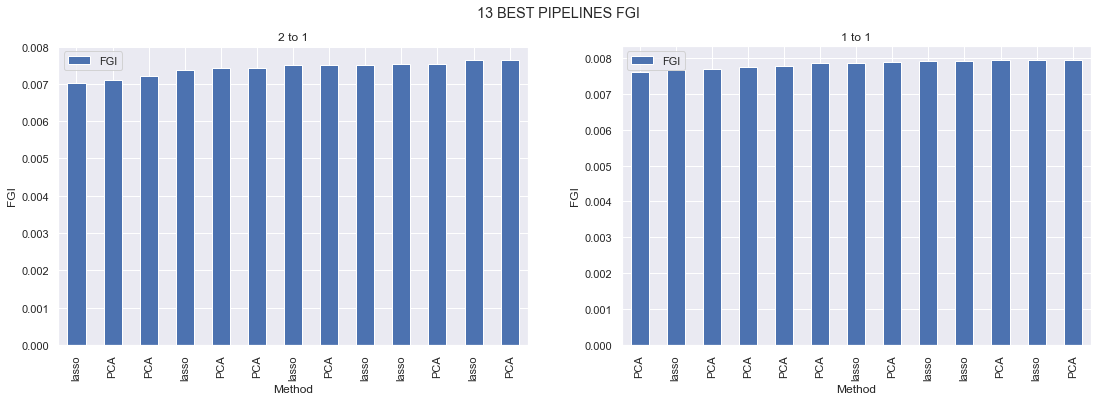

In [113]:
two_to_one_filtered = filter_on_baselines(two_to_one_df)
one_to_one_filtered = filter_on_baselines(one_to_one_df)

smallest_FGI_two_to_one = two_to_one_df.nsmallest(13, "FGI")
smallest_FGI_one_to_one = one_to_one_df.nsmallest(13, "FGI")


fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18.5, 5.5, forward=True)
dfs = [smallest_FGI_two_to_one, smallest_FGI_one_to_one]
titles = ["2 to 1", "1 to 1"]

def plot_scores_with_dimensionality_reduction(df, ax, title):
    ax = df.plot(kind="bar", y="FGI", use_index=False, ax=ax)
    ax.set_xticklabels(df["dimensionality_reduction"], rotation=90)
    ax.set_xlabel("Method")
    ax.set_ylabel("FGI")
    ax.set_title(title)

for df, ax, title in zip(dfs, axes, titles):
    plot_scores_with_dimensionality_reduction(df, ax, title)

fig.suptitle("13 BEST PIPELINES FGI")
fig.savefig("plots/dimensionality_reduction_generalizability.jpg")

## FEATURES

### TWO TO ONE RMSE

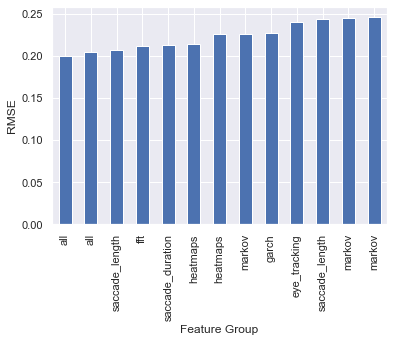

In [362]:
smallest = df.nsmallest(13, "rmse")

ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
ax.set_xlabel("Feature Group")
ax.set_ylabel("RMSE")
ax.get_figure().savefig("plots/feature_groups_rmse_two_dataset.jpg")

### TWO TO ONE OOS RMSE

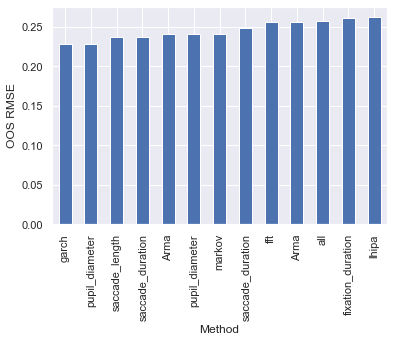

In [360]:
smallest = df.nsmallest(13, "oos_rmse")

ax = smallest.loc[:,"oos_rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("OOS RMSE")
ax.get_figure().savefig("plots/feature_groups_oos_rmse_two_dataset.jpg")

### ONE TO ONE  RMSE

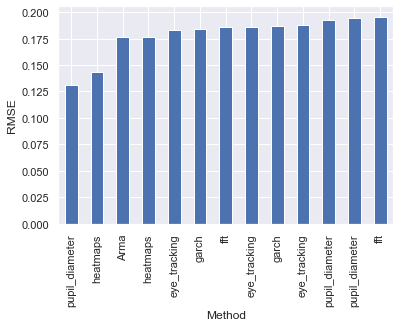

In [361]:
smallest = one_to_one_df.nsmallest(13, "rmse")
def plot
ax = smallest.loc[:,"rmse"].plot(kind="bar", use_index=False)
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("RMSE")
ax.get_figure().savefig("plots/feature_groups_rmse_one_to_one.jpg")

['fractions_cscw' 'emip_fractions' 'emip_cscw']


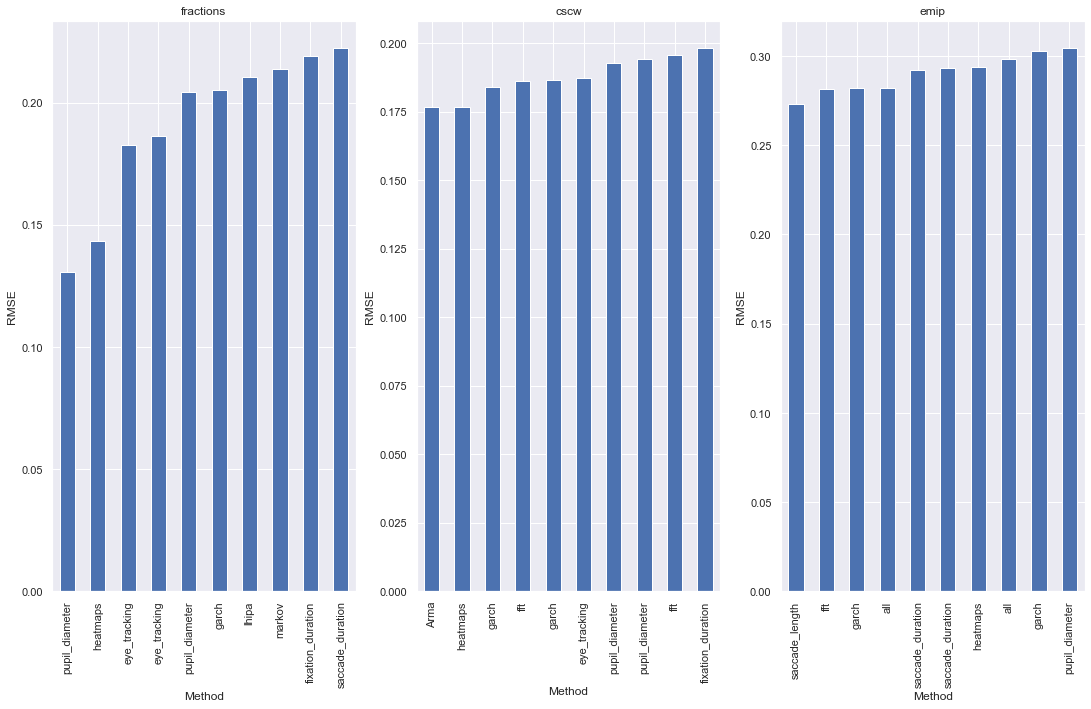

In [396]:
def plot_13_smallest_feature_generation(df, ax, dataset):
    ax = df.loc[:, "rmse"].plot(kind="bar", use_index=False, ax=ax)
    ax.set_xticks(range(len(smallest)))
    ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
    ax.set_title(dataset)
    ax.set_xlabel("Method")
    ax.set_ylabel("RMSE")

print(df.loc[:, "in_study"].unique())
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 10.5, forward=True)
for dataset, ax in zip(one_to_one_df.loc[:, "in_study"].unique(), axes):
    smallest = one_to_one_df[one_to_one_df["in_study"] == dataset].nsmallest(10, "rmse")
    plot_13_smallest_feature_generation(smallest, ax, dataset)

['fractions_cscw' 'emip_fractions' 'emip_cscw']


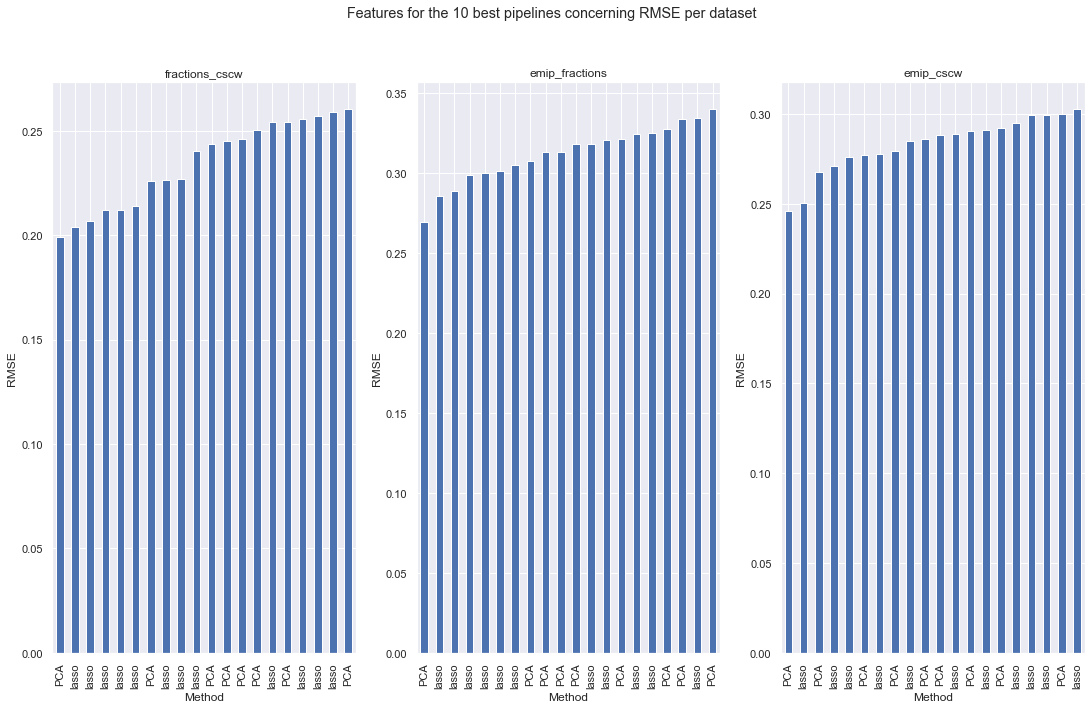

In [6]:
def plot_13_smallest_feature_generation(df, ax, dataset):
    ax = df.loc[:, "rmse"].plot(kind="bar", use_index=False, ax=ax)
    ax.set_xticks(range(len(smallest)))
    ax.set_xticklabels(smallest["dimensionality_reduction"], rotation=90)
    ax.set_title(dataset)
    ax.set_xlabel("Method")
    ax.set_ylabel("RMSE")

print(df.loc[:, "in_study"].unique())
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 10.5, forward=True)
fig.suptitle("Features for the 10 best pipelines concerning RMSE per dataset")
for dataset, ax in zip(df.loc[:, "in_study"].unique(), axes):
    smallest = df[df["in_study"] == dataset].nsmallest(20, "rmse")
    plot_13_smallest_feature_generation(smallest, ax, dataset)

['fractions_cscw' 'emip_fractions' 'emip_cscw']


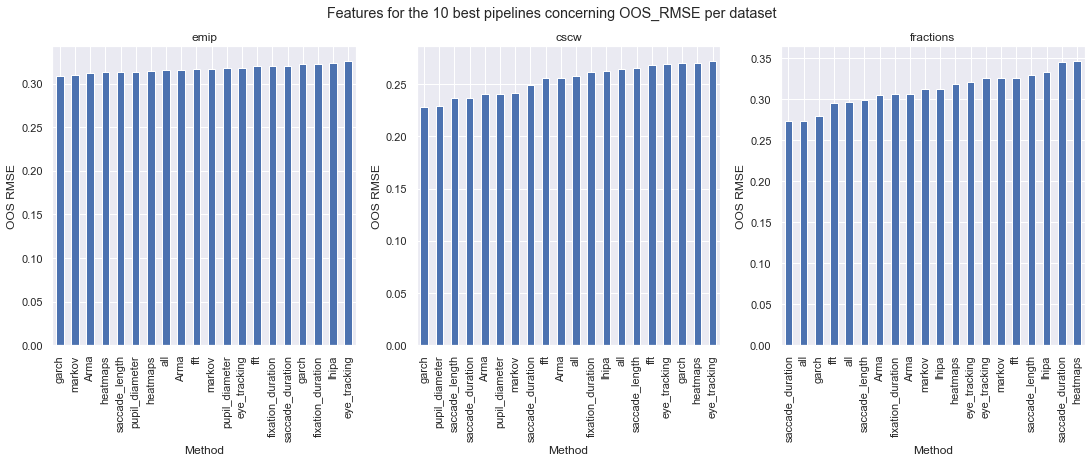

In [15]:
def plot_13_smallest_feature_generation(df, ax, dataset):
    ax = df.loc[:, "oos_rmse"].plot(kind="bar", use_index=False, ax=ax)
    ax.set_xticks(range(len(smallest)))
    ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
    ax.set_title(dataset)
    ax.set_xlabel("Method")
    ax.set_ylabel("OOS RMSE")

print(df.loc[:, "in_study"].unique())
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 5.5, forward=True)
fig.suptitle("Features for the 10 best pipelines concerning OOS_RMSE per dataset")
for dataset, ax in zip(df.loc[:, "out_of_study"].unique(), axes):
    smallest = df[df["out_of_study"] == dataset].nsmallest(20, "oos_rmse")
    plot_13_smallest_feature_generation(smallest, ax, dataset)

['fractions_cscw' 'emip_fractions' 'emip_cscw']


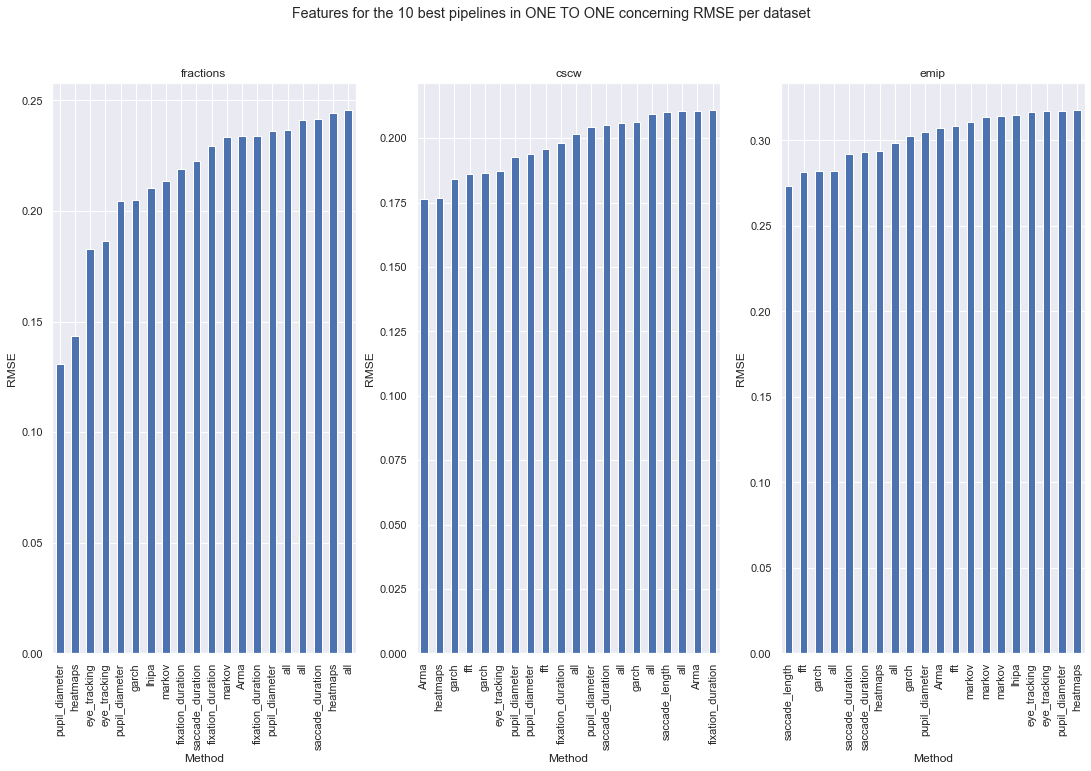

In [433]:
def plot_13_smallest_feature_generation(df, ax, dataset):
    ax = df.loc[:, "rmse"].plot(kind="bar", use_index=False, ax=ax)
    ax.set_xticks(range(len(smallest)))
    ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
    ax.set_title(dataset)
    ax.set_xlabel("Method")
    ax.set_ylabel("RMSE")

print(df.loc[:, "in_study"].unique())
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18.5, 10.5, forward=True)
fig.suptitle("Features for the 10 best pipelines in ONE TO ONE concerning RMSE per dataset")
for dataset, ax in zip(one_to_one_df.loc[:, "in_study"].unique(), axes):
    smallest = one_to_one_df[one_to_one_df["in_study"] == dataset].nsmallest(20, "rmse")
    plot_13_smallest_feature_generation(smallest, ax, dataset)

Text(0, 0.5, 'RMSE')

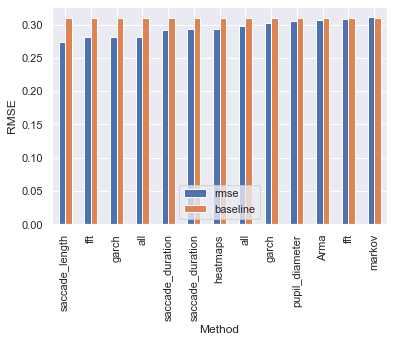

In [422]:
smallest = one_to_one_df[one_to_one_df["in_study"] == "emip"].nsmallest(13, "rmse")

ax = smallest.plot(kind="bar", y=["rmse", "baseline"], x="feature_combinations")
ax.set_xticks(range(len(smallest)))
ax.set_xticklabels(smallest["feature_combinations"], rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("RMSE")